In [1]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features, read_duration,checkForExist,read_did_pred,ScoresAveraging,DoneFeatureMan
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
from preamble import *
Cat = [20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]

amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


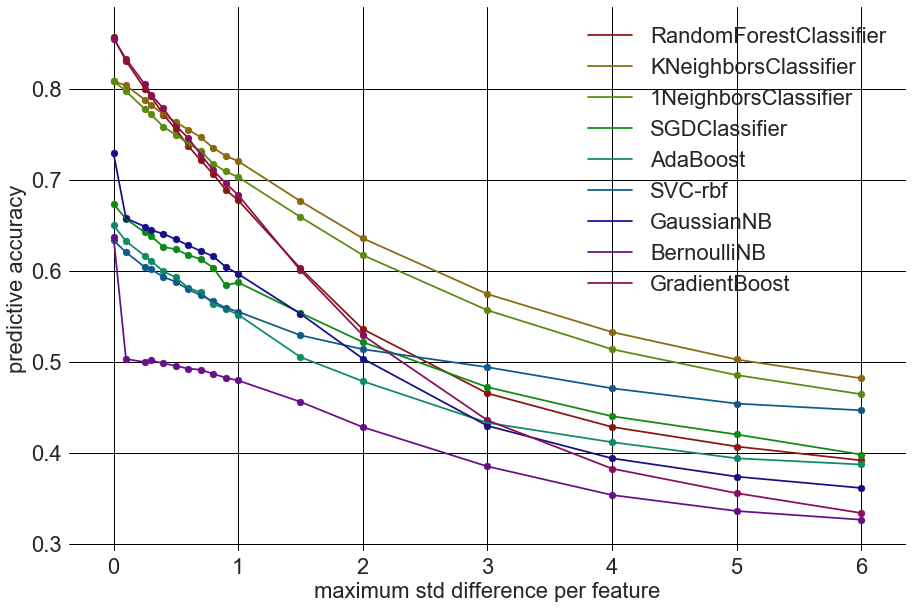

In [23]:
# Feature noise in numerical datasets
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

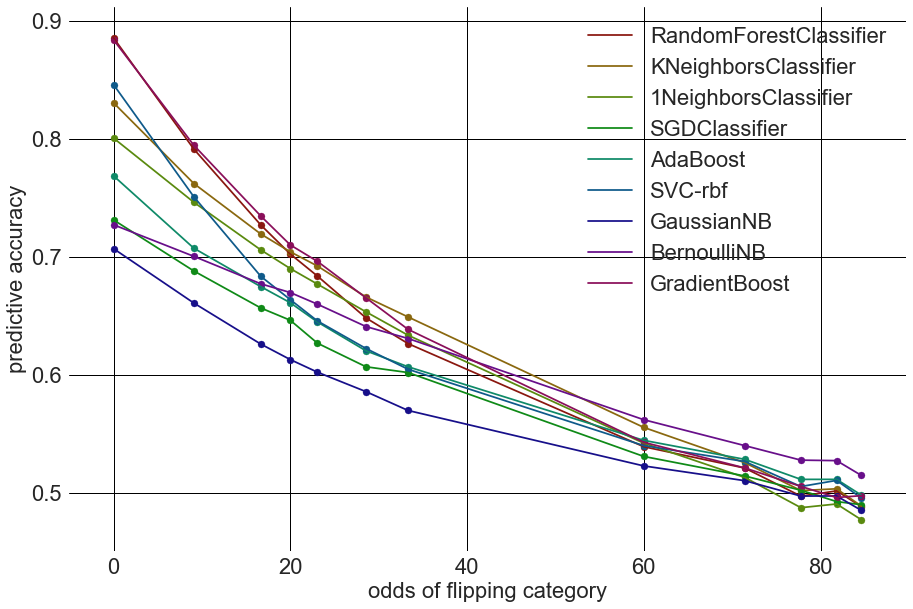

In [22]:
# feature noise in categorical datasets
func = 'cvfeatureCAT2'
scores = []
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
didList = [3,20, 21, 26, 333, 334, 335, 40668, 4135, 4534, 469, 46, 50]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
flipped = []
for i in amountList:
    if i > 0.5:
        flipped.append((1-1/(i+0.5))*100)
    else:
        flipped.append(0)
x_axis = flipped
fig, ax = plt.subplots()
# _=plt.title(' performance to flipping categories, categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('odds of flipping category')
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()


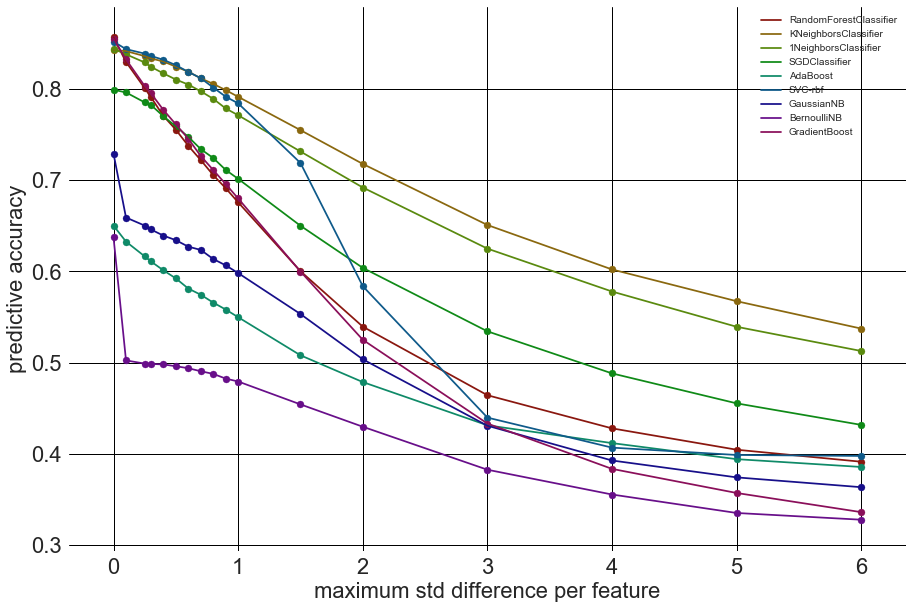

In [28]:
# preprocessed Numerical features
func = 'cvNoisePreProcess'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

In [ ]:
# absolute addition of values 
func = 'cvScoreNoise3'
name = 'scores'
didList = [10,12,18]
amountList = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf']
scores = []

for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,amount,did):
                print(func,clfName,amount,did)
            score1.append(read_did_pred(func,clfName,amount,did,name))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (sum(scores[k][j][i][0]))/10/len(didList)
            score2[j][i] = score2[j][i] + (sum(scores[k][j][i][1]))/10/len(didList)

x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance to adding flat values to each features ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('flat amount added')
fig.set_figheight(10)
fig.set_figwidth(10)
# ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposy='clip')
# _=plt.xticks(x_axis,x_axis ,rotation='vertical')
# for i,amount in enumerate(amountList):
#     _=plt.axvline(x=amount,color= 'black')
# #     _=plt.axhline(y=score2[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

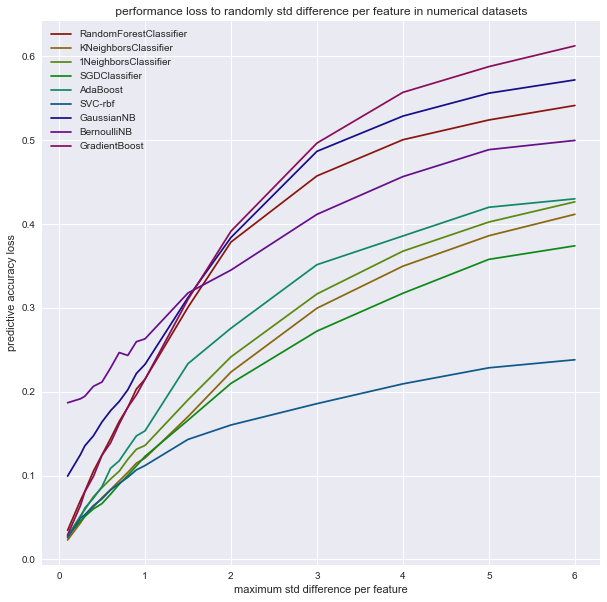

In [2]:
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

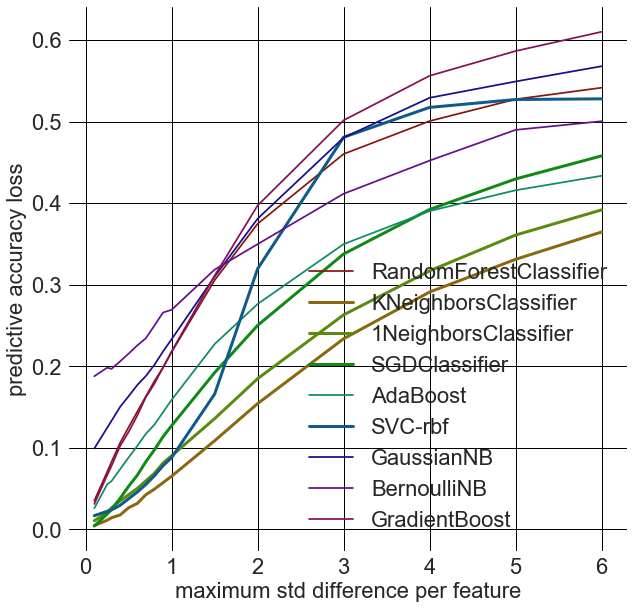

In [9]:
func = 'cvNoisePreProcess'
pres = [1,2,3,5]
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    if i in pres:
        _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i],linewidth=3)
    else:
        _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

cvScoreFeatures4 RandomForestClassifier 0.25 1120
cvScoreFeatures4 RandomForestClassifier 0.5 1120
cvScoreFeatures4 RandomForestClassifier 1.0 1120
cvScoreFeatures4 KNeighborsClassifier 0.25 1120
cvScoreFeatures4 KNeighborsClassifier 0.5 1120
cvScoreFeatures4 KNeighborsClassifier 1.0 1120
cvScoreFeatures4 SGDClassifier 0.25 1120
cvScoreFeatures4 SGDClassifier 0.5 1120
cvScoreFeatures4 SGDClassifier 1.0 1120
cvScoreFeatures4 SVC-rbf 0.25 1120
cvScoreFeatures4 SVC-rbf 0.5 1120
cvScoreFeatures4 SVC-rbf 1.0 1120
cvScoreFeatures4 GaussianNB 0.25 1120
cvScoreFeatures4 GaussianNB 0.5 1120
cvScoreFeatures4 GaussianNB 1.0 1120
cvScoreFeatures4 BernoulliNB 0.5 1120
cvScoreFeatures4 BernoulliNB 1.0 1120
cvScoreFeatures4 GradientBoost 0.25 1120
cvScoreFeatures4 GradientBoost 0.5 1120
cvScoreFeatures4 GradientBoost 1.0 1120


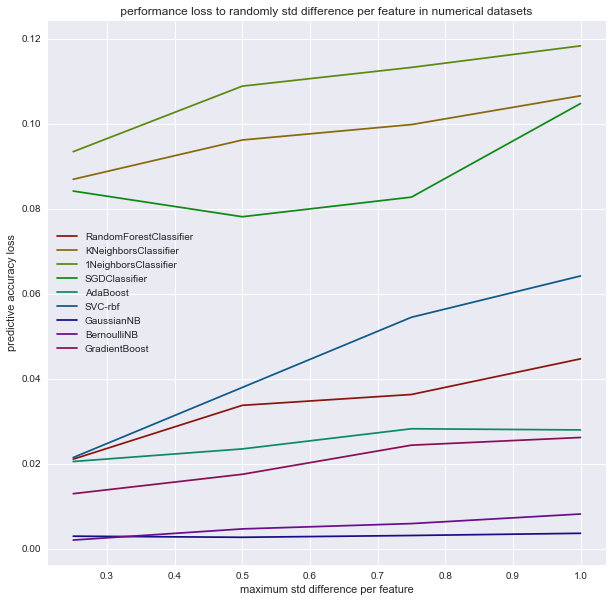

In [6]:
func = 'cvScoreFeatures4'
scores = []
amountList = [0.25,0.5,0.75,1.0]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()

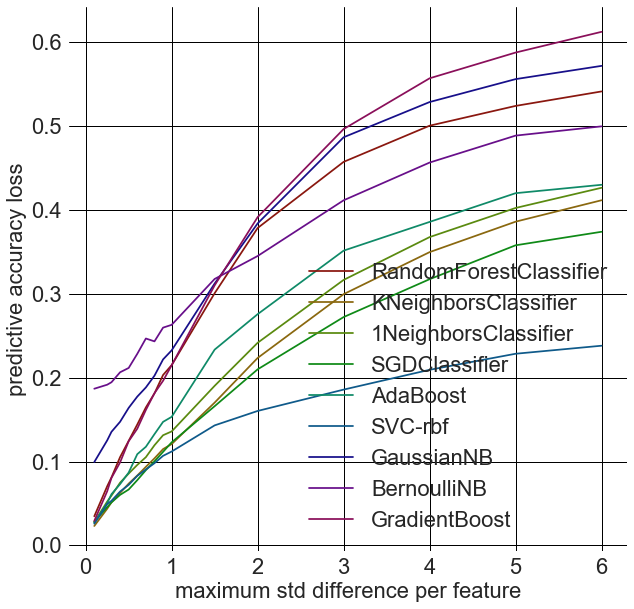

In [27]:
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

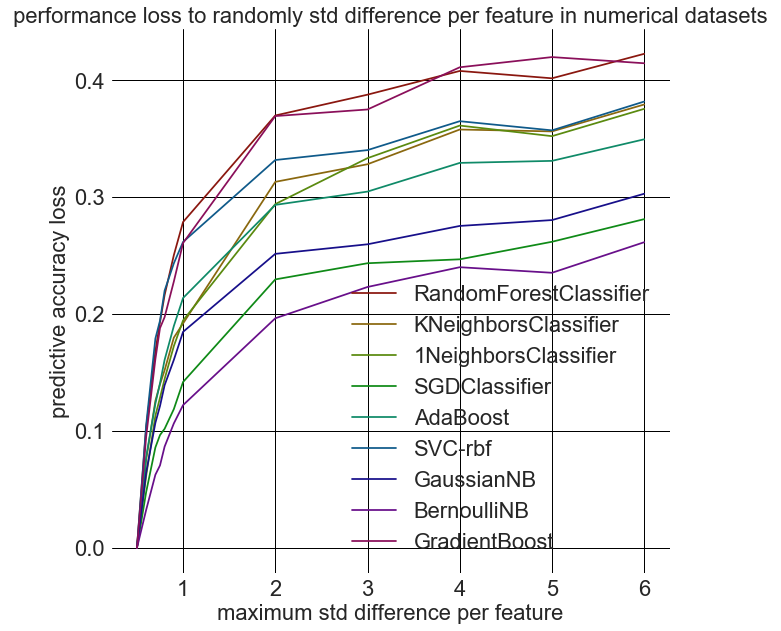

In [7]:
func = 'cvFeatureCAT2'
scores = []
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
didList = Cat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score2[j][i] = score2[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/len(didList)
            if scores[k][j][i][0] == 0:
                score3[j][i] = score3[j][i]
            else:
                score3[j][i] = score3[j][i] + abs(scores[k][j][i][0]-scores[k][j][i][1])/scores[k][j][i][0]/len(didList)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' performance loss to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
    _=ax.plot(x_axis, score3[i],label=clfNames[i], color = cl[i])
#     _=ax.plot(x_axis[1:],score2[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy loss')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()
print('categorical needs to change to flipping categories percentage')

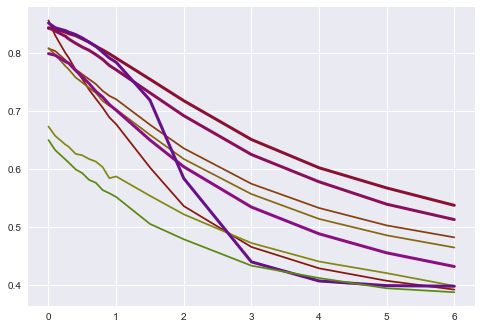

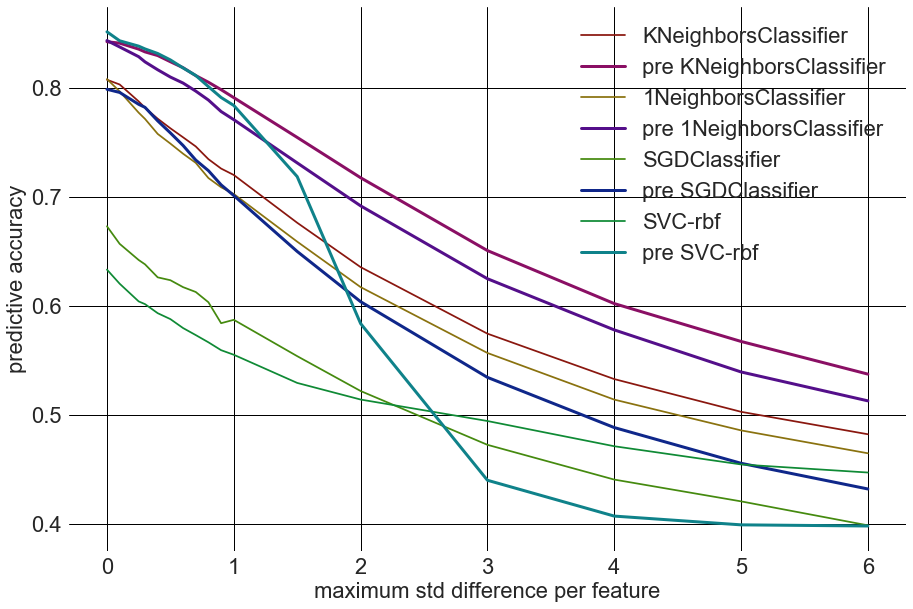

In [25]:
# Feature noise in numerical datasets
clfNames = [ 'KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'SVC-rbf']

func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)

func = 'cvNoisePreProcess'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score5 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score5.append(read_features(func,clfName,did,amount))
        scores[i].append(score5)
count = []
for amount in amountList:
    count.append(str(amount))
score3= []
score4 = []
ratio = []
for i in clfNames:
    score3.append([0 for i in range(len(amountList))])
    score4.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score3[j][i] = score3[j][i] + (scores[k][j][i][0])/len(didList)
            score4[j][0] = score4[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score4[j][i+1] = score4[j][i+1] + (scores[k][j][i][1])/len(didList)            


amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
# _=plt.title(' performance to randomly std difference per feature in numerical datasets ')
aL = int(len(score1)*2)
cl = sns.hls_palette(aL, l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
#     _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(x_axis, score4[i],label= 'pre ' + clfNames[i], color = cl[aL-i-1],linewidth = 3)
#     _=ax.scatter(x_axis, score4[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

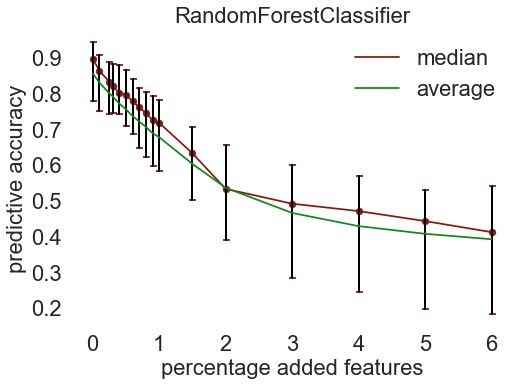

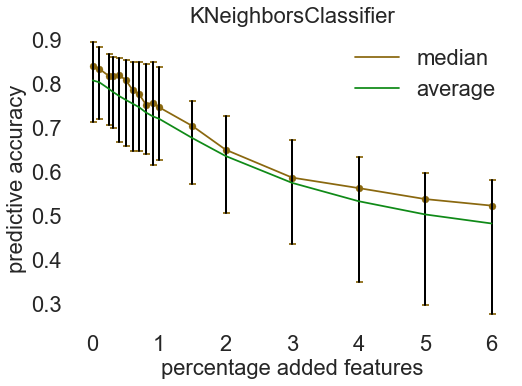

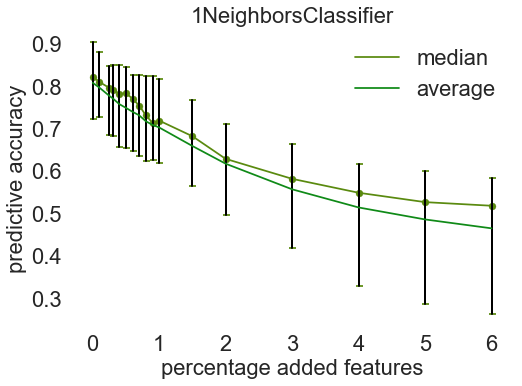

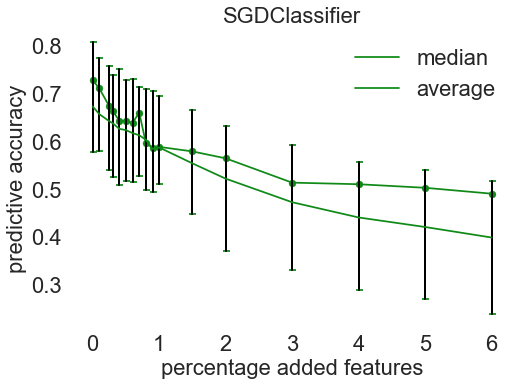

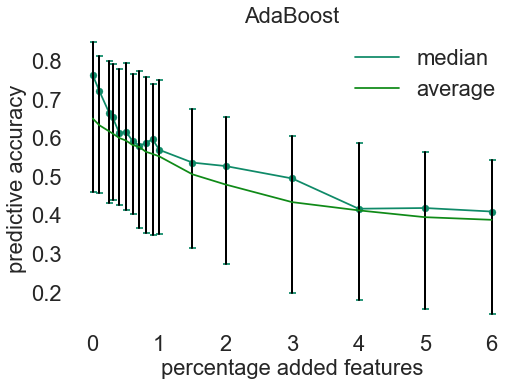

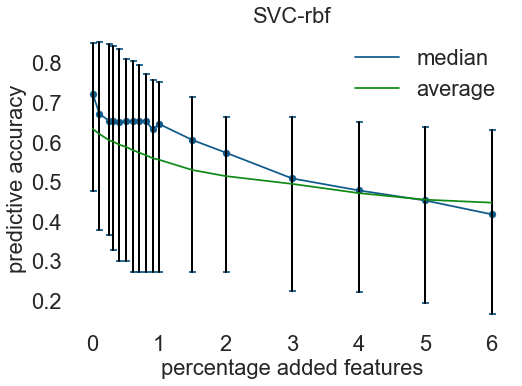

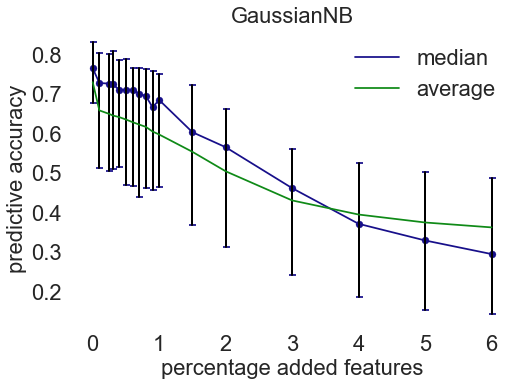

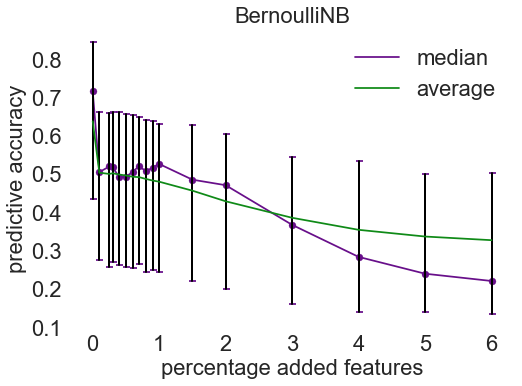

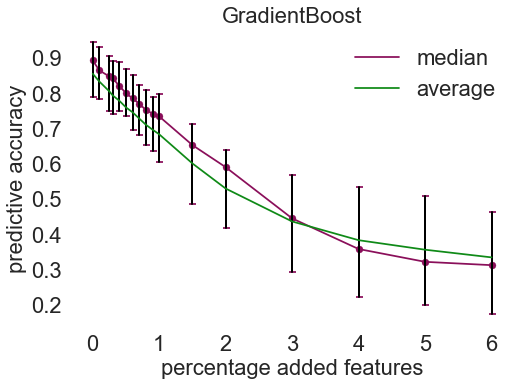

In [7]:
# Feature noise in numerical datasets
func = 'cvFeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([[] for i in range(len(amountList))])
    score2.append([[] for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i].append(scores[k][j][i][0])
            score2[j][0].append(scores[k][j][i][0])
            score2[j][i+1].append(scores[k][j][i][1])
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2

cl = sns.hls_palette(len(score2), l=.3, s=.8)
for k,clfName in enumerate(clfNames):
    lines = CIIntervals(score2[k])
    fig, ax = plt.subplots()    
    _=ax.plot(x_axis, lines[1], color = cl[k],label = 'median')
    _=ax.scatter(x_axis, lines[1], color = cl[k])
    _=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
    _=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
    for i,item in enumerate(x_axis):
        ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2)
    _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('percentage added features')
    plt.title(clfName)
    ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()


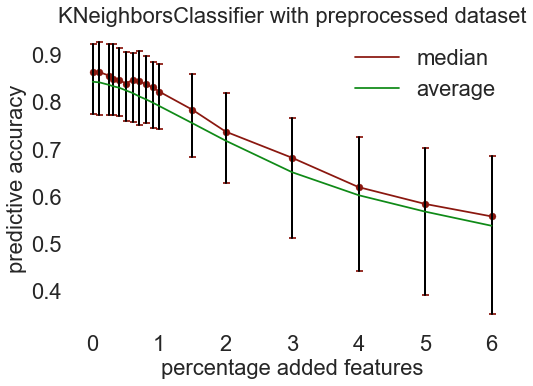

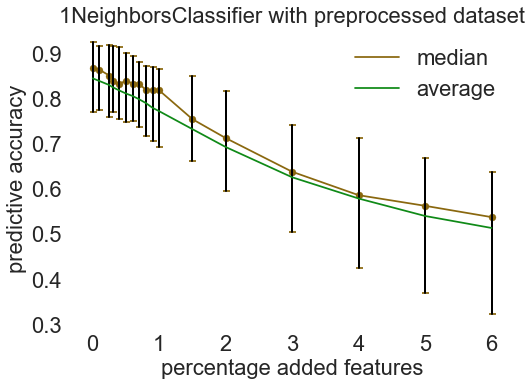

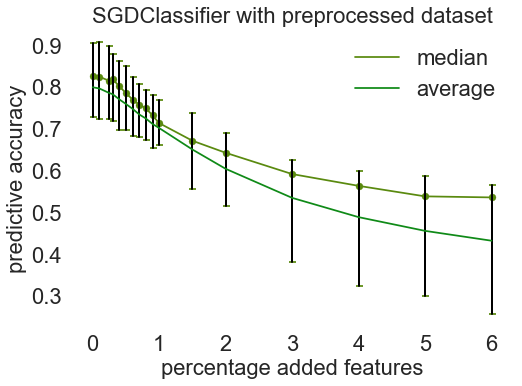

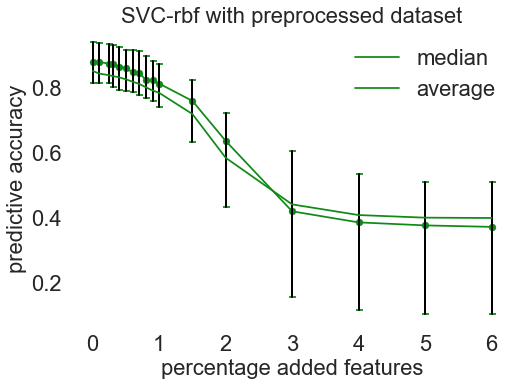

In [9]:
# from Noise2 import CIIntervals
# clfNames = [ 'KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'SVC-rbf']
# func = 'cvNoisePreProcess'
# scores = []
# amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
# didList = NonCat#[54,53,39,40509,1515,1043,1570,30,28,375]#NonCat
# for i,did in enumerate(didList):
#     scores.append([])
#     for clfName in clfNames:
#         score5 = []
#         for amount in amountList:
#             if not checkForExist(func,clfName,did,amount):
#                 print(func,clfName,amount,did)
#             score5.append(read_features(func,clfName,did,amount))
#         scores[i].append(score5)
# count = []
# for amount in amountList:
#     count.append(str(amount))
# score3= []
# score4 = []
# ratio = []
# for i in clfNames:
#     score3.append([[] for i in range(len(amountList))])
#     score4.append([[] for i in range(len(amountList)+1)])
#     ratio.append([])
# MaxClass = []
# j = 0
# for k,x in enumerate(scores):
#     for j in range(0,len(x)):    
#         for i in range(0,len(x[j])):
#             score3[j][i].append(scores[k][j][i][0])
#             score4[j][0].append(scores[k][j][i][0])
#             score4[j][i+1].append(scores[k][j][i][1])
# amountList2 = [0]
# for i in amountList:
#     amountList2.append(i)
# x_axis = amountList2
            
cl = sns.hls_palette(len(score2), l=.3, s=.8)
for k,clfName in enumerate(clfNames):
    lines = CIIntervals(score4[k])
    fig, ax = plt.subplots()    
    _=ax.plot(x_axis, lines[1], color = cl[k],label = 'median')
    _=ax.scatter(x_axis, lines[1], color = cl[k])
    _=ax.scatter(x_axis, lines[0], color = cl[k], marker = "_")
    _=ax.scatter(x_axis, lines[2], color = cl[k], marker = "_")
    for i,item in enumerate(x_axis):
        ax.plot([item, item], [lines[0][i], lines[2][i]], 'k-', lw=2)
    _=ax.plot(x_axis, lines[3], color = cl[3],label = 'average')
    _=plt.ylabel('predictive accuracy')
    _=plt.xlabel('percentage added features')
    plt.title(clfName + ' with preprocessed dataset')
    ax.legend( prop={'size': 22})
#     plt.grid(True,color='black')
    ax.set_facecolor('xkcd:white')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(22)    
    plt.show()